In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 20

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.2463 - acc: 0.9244 - val_loss: 0.1220 - val_acc: 0.9586
Epoch 2/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.1056 - acc: 0.9678 - val_loss: 0.0970 - val_acc: 0.9690
Epoch 3/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0741 - acc: 0.9777 - val_loss: 0.0863 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.0589 - acc: 0.9816 - val_loss: 0.0838 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0516 - acc: 0.9840 - val_loss: 0.0842 - val_acc: 0.9806
Epoch 6/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.0423 - acc: 0.9871 - val_loss: 0.0773 - val_acc: 0.9811
Epoch 7/20
60000/60000 [==============================] - 18s 295us/step - loss: 0.0411 - acc: 0.9884 - val_loss: 0.

In [6]:
model.save('mnist.mlp.model')

In [20]:
print(type(x_train))
print(x_train.shape)
print(x_train[0].shape)

<class 'numpy.ndarray'>
(60000, 784)
(784,)


In [65]:
result = model.predict_classes(x_test[:10])

In [66]:
print(result[:10])
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


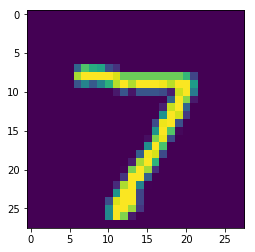

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(x_test[0].reshape(28, 28))

(28, 28)


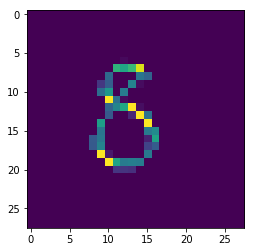

In [102]:
import cv2

%matplotlib inline
import matplotlib.pyplot as plt
#model = load_model('cnn_model_2.h5')
img = cv2.imread('8.png', 0)
plt.imshow(img)
print(img.shape)

In [103]:
data = (img.reshape(1,784)).astype("float32")
predict = model.predict_classes(data)
print ('识别为：')
print (predict)

识别为：
[6]
